# Deep Learning

## HW2- Problem 2 - predicting world cup results!

Full Name: Mohammad Kalbasi

Student Number: 401211028

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor,Lambda
import matplotlib
import seaborn as sns
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


Part A) loading data

In [ ]:
match_df = pd.read_csv('./data/international_matches.csv')
match_df.tail(10)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,1,...,No,Draw,75.0,75.0,74.8,78.7,80.0,76.5,72.7,73.8
23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,3,...,No,Win,76.0,83.0,74.2,77.0,78.0,70.0,72.3,73.5
23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,...,No,Lose,77.0,65.0,73.5,73.7,75.0,76.2,74.7,68.2
23914,2022-06-14,Luxembourg,Faroe Islands,Europe,Europe,94,124,1229,1137,2,...,No,Draw,69.0,NaN,68.5,NaN,69.8,NaN,NaN,NaN
23915,2022-06-14,Turkey,Lithuania,Europe,Europe,43,138,1461,1092,2,...,No,Win,79.0,71.0,78.2,76.7,78.2,NaN,NaN,NaN
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


Part B) scatter plot

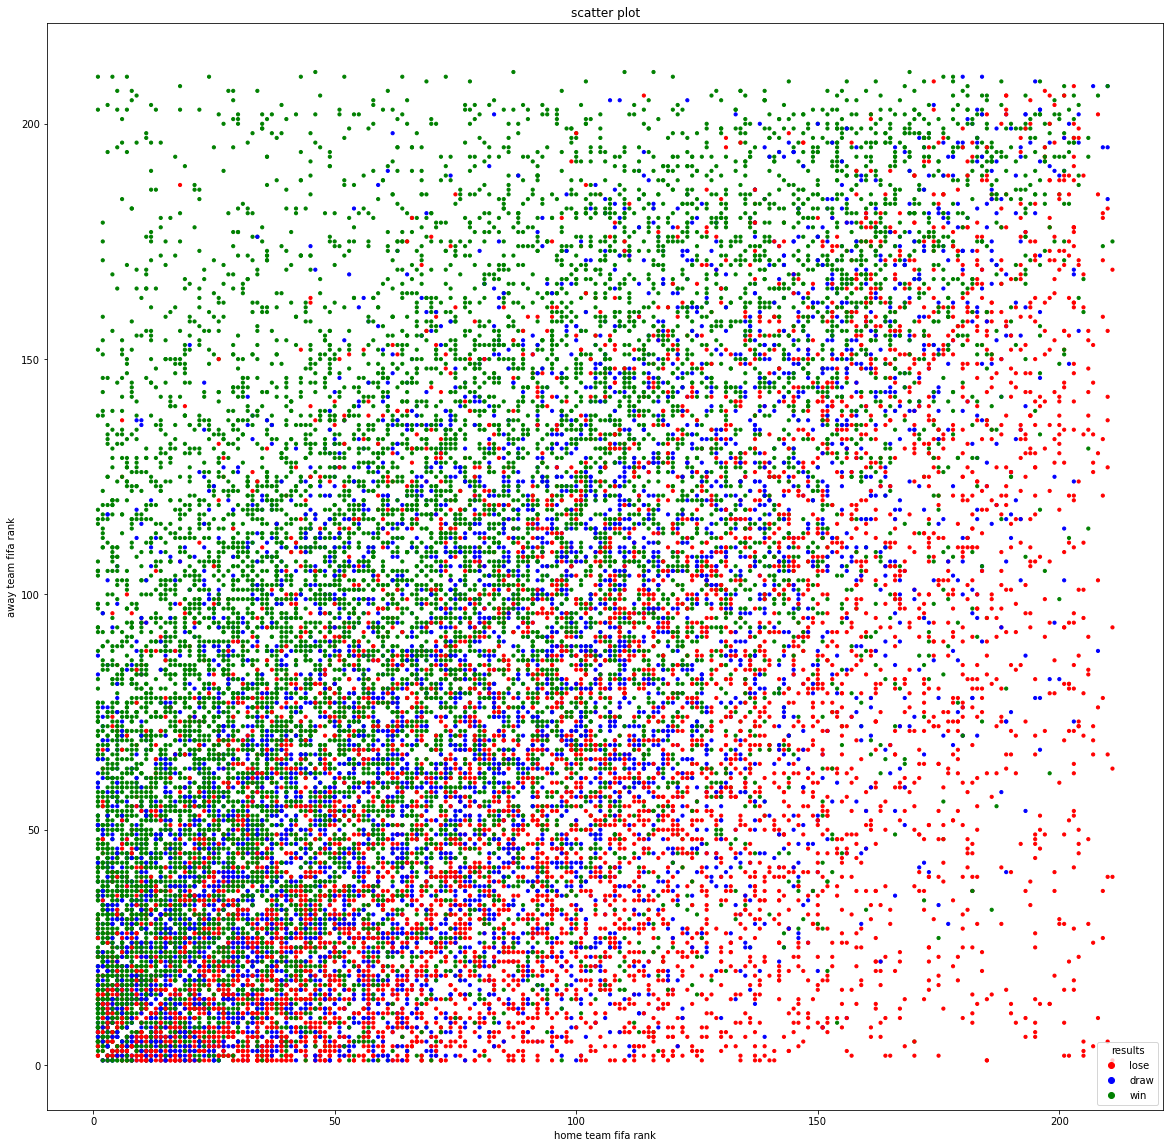

In [ ]:
x = match_df['home_team_fifa_rank'].to_numpy()
y = match_df['away_team_fifa_rank'].to_numpy()
result = match_df['home_team_result']
result_numeric = np.zeros((len(result),))
result_numeric[result == 'Win'] = 2
result_numeric[result == 'Draw'] = 1
result_numeric[result == 'Lose'] = 0
result_names = ['lose','draw','win']
colors = ['red','blue','green']
fig = plt.figure(figsize=(20,20))
scatter = plt.scatter(x, y, c=result_numeric, cmap=matplotlib.colors.ListedColormap(colors),s = 10) 
plt.xlabel('home team fifa rank')
plt.ylabel('away team fifa rank')
plt.title('scatter plot')
plt.legend(handles=scatter.legend_elements()[0], 
           labels=result_names,
           title="results")
plt.show()


as we can see, team with lower rank have better chance to win games(wich is expected!)

part c) Data sorting

In [ ]:
feature_chosen = match_df[['home_team_fifa_rank','away_team_fifa_rank','home_team_total_fifa_points','away_team_total_fifa_points']]
feature_non_zero = feature_chosen[(feature_chosen['home_team_total_fifa_points'] != 0) &(feature_chosen['away_team_total_fifa_points'] != 0)]
feature_mat = feature_non_zero.to_numpy()
result_numeric_chosen = result_numeric[(feature_chosen['home_team_total_fifa_points'] != 0) &(feature_chosen['away_team_total_fifa_points'] != 0)]
feature_non_zero.head(50)


,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points
14250,114,158,260,112
14251,120,129,245,208
14252,108,88,298,364
14253,101,98,325,328
14254,96,127,338,221
14255,141,183,179,56
14256,92,131,348,207
14257,165,162,104,104
14258,103,95,311,340
14260,177,197,78,10


In [ ]:
def to_categorical(y):
  """
  function for turn labels to categorical form(one hot coding)
  input:
    y:input labels;
  output:
    ycat: one hot coded labels
  """
  m = int(np.max(y)) 
  ycat = np.zeros((len(y),m+1))
  for i in range(len(y)):
    ycat[i,int(y[i])] = 1
  return ycat


In [ ]:
# splitting test and train dataset
np.random.seed(32)
index_select = (np.arange(len(feature_mat)))
np.random.shuffle(index_select)
yc = to_categorical(result_numeric_chosen) # creating one hot coded 
range_select = int(0.75*len(yc))

Xt_array = feature_mat[index_select[0:range_select],:]
yt_array = result_numeric_chosen[index_select[0:range_select],].squeeze()

X_test = torch.tensor(feature_mat[index_select[range_select:],:],dtype = torch.float32,device = device)
y_test = torch.tensor(result_numeric_chosen[index_select[range_select:],].squeeze(),dtype = int,device = device).long()

Part D) correlation of features

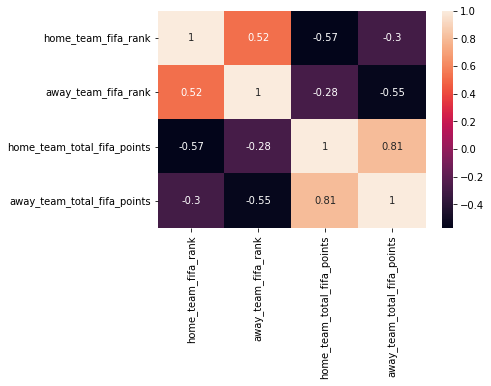

In [ ]:
sns.heatmap(feature_non_zero.corr(),annot = True); 

Part E and F)

creating Dataloader for trainin phase!

In [ ]:
class wc_score(Dataset):
    # This loads the data and converts it, make data rdy
    def __init__(self):
       
        
        self.dataset=torch.tensor(Xt_array,dtype = torch.float32,device = device)

        self.labels=torch.tensor(yt_array,dtype = torch.int,device = device).long()
    
    # This returns the total amount of samples in your Dataset
    def __len__(self):
        return len(self.dataset)
    
    # This returns given an index the i-th sample and label
    def __getitem__(self, idx):
        return self.dataset[idx],self.labels[idx]

In [ ]:
ds = wc_score()
dl=DataLoader(ds,batch_size=64, shuffle=True,drop_last=False)

In [ ]:
# defining accuracy function
def accuracy_manual(y, yp):
    yyp =  torch.max(yp,axis = 1).indices
    correct = torch.eq(y, yyp).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(yp)) * 100 
    return acc

In [ ]:
class MLPnet1(nn.Module):
    def __init__(self, input_features, output_features):
        """
        model for classification of world cup results
        input:
            input_features: Number of input features to the model.
            out_features: Number of output features of the model
              
          
        """
        super().__init__()
        self.layerstack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10, out_features=20),
            nn.ReLU(),
            nn.Linear(in_features=20, out_features=8),
            nn.ReLU() ,
            nn.Linear(in_features=8, out_features=output_features),
        )
        
    
    def forward(self, x):
        return F.log_softmax(self.layerstack(x),dim = 1)

# Create an instance of BlobModel and send it to the target device
model_simple = MLPnet1(4,3)

In [ ]:
# optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(model_simple.parameters(), lr=learning_rate)
train_loss = []
train_acc = []
test_loss = []
test_acc = []

In [ ]:
epochs = 200
for epoch in range(epochs):
  ### Training
  model_simple.train()
  loss_train = 0
  acc_train = 0
  counter = 1
  for batch,label in dl:
    # 1. Forward pass
    y_pred = model_simple(batch) # model outputs raw logits 
    
    # print(y_logits)
    # 2. Calculate loss and accuracy
    counter = counter + 1
    loss = F.nll_loss(y_pred, label)
    acc_train = acc_train + accuracy_manual(label,y_pred)
    loss_train = loss_train + loss
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()
  loss_train = loss_train/counter
  acc_train = acc_train/counter
  train_acc.append(acc_train)
  train_loss.append(loss_train)
  ### Testing
  model_simple.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_pred = model_simple(X_test)
    # 2. Calculate test loss and accuracy
    loss_test= F.nll_loss(test_pred, y_test)
    acc_test = accuracy_manual(y_test,test_pred)
  test_loss.append(loss_test)
  test_acc.append(acc_test)
  # Print out what's happening
  if epoch % 1 == 0:
      print(f"Epoch: {epoch} | Loss: {loss_train:.5f}, Acc: {acc_train:.2f}% | Test Loss: {loss_test:.5f}, Test Acc: {acc_test:.2f}%") 


Epoch: 0 | Loss: 1.27588, Acc: 49.18% | Test Loss: 0.97453, Test Acc: 50.90%
Epoch: 1 | Loss: 0.94959, Acc: 53.77% | Test Loss: 0.96775, Test Acc: 52.86%
Epoch: 2 | Loss: 0.94490, Acc: 55.66% | Test Loss: 0.96904, Test Acc: 56.52%
Epoch: 3 | Loss: 0.94050, Acc: 56.72% | Test Loss: 0.94970, Test Acc: 57.36%
Epoch: 4 | Loss: 0.93605, Acc: 56.68% | Test Loss: 0.93984, Test Acc: 57.36%
Epoch: 5 | Loss: 0.93292, Acc: 56.93% | Test Loss: 0.94349, Test Acc: 57.23%
Epoch: 6 | Loss: 0.93174, Acc: 56.82% | Test Loss: 0.97892, Test Acc: 56.86%
Epoch: 7 | Loss: 0.93011, Acc: 56.86% | Test Loss: 0.94214, Test Acc: 57.36%
Epoch: 8 | Loss: 0.93041, Acc: 56.85% | Test Loss: 0.93710, Test Acc: 57.11%
Epoch: 9 | Loss: 0.92861, Acc: 56.82% | Test Loss: 0.93352, Test Acc: 57.23%
Epoch: 10 | Loss: 0.92639, Acc: 57.16% | Test Loss: 0.94179, Test Acc: 57.02%
Epoch: 11 | Loss: 0.92774, Acc: 56.73% | Test Loss: 0.93566, Test Acc: 57.27%
Epoch: 12 | Loss: 0.92730, Acc: 56.79% | Test Loss: 0.93702, Test Acc: 57.

**in previous part we achived our goal(test accuracy around %55)**
in next part we try to improve our result but as we can see it only make things worse!
** **so you can skip next part! ****

In [ ]:
# for improving result, first we normalize each feature between 0 and 1 
# then we add dropout to our model
feature_mat_nomalized = np.zeros(np.shape(feature_mat))
_,n = np.shape(feature_mat)
for i in range(n):
  feature_mat_nomalized[:,i] = (feature_mat[:,i] - np.min(feature_mat[:,i]))/ (np.max(feature_mat[:,i]) - np.min(feature_mat[:,i]))

index_select = (np.arange(len(feature_mat)))
np.random.shuffle(index_select)
yc = to_categorical(result_numeric_chosen) # creating one hot coded 
range_select = int(0.75*len(yc))

Xt_array = feature_mat_nomalized[index_select[0:range_select],:]
yt_array = result_numeric_chosen[index_select[0:range_select],].squeeze()

X_test = torch.tensor(feature_mat_nomalized[index_select[range_select:],:],dtype = torch.float32,device = device)
y_test = torch.tensor(result_numeric_chosen[index_select[range_select:],].squeeze(),dtype = int,device = device).long()

In [ ]:
class wc_score_normal(Dataset):
    # This loads the data and converts it, make data rdy
    def __init__(self):
       
        
        self.dataset=torch.tensor(Xt_array,dtype = torch.float32,device = device)

        self.labels=torch.tensor(yt_array,dtype = torch.int,device = device).long()
    
    # This returns the total amount of samples in your Dataset
    def __len__(self):
        return len(self.dataset)
    
    # This returns given an index the i-th sample and label
    def __getitem__(self, idx):
        return self.dataset[idx],self.labels[idx]

In [ ]:
ds = wc_score_normal()
dl=DataLoader(ds,batch_size=64, shuffle=True,drop_last=False)

In [ ]:
class MLPnet2(nn.Module):
    def __init__(self, input_features, output_features):
        """
        model for classification of world cup results
        input:
            input_features: Number of input features to the model.
            out_features: Number of output features of the model
              
          
        """
        super().__init__()
        self.layerstack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=40),
            nn.ReLU(),
            nn.Linear(in_features=40, out_features=100),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(in_features=100, out_features=16),
            nn.ReLU() ,
            nn.Linear(in_features=16, out_features=output_features),
        )
        
    
    def forward(self, x):
        return F.log_softmax(self.layerstack(x))

# Create an instance of BlobModel and send it to the target device
model2 = MLPnet2(4,3)

In [ ]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model_simple.parameters(), lr=learning_rate)
train_loss = []
train_acc = []
test_loss = []
test_acc = []

In [ ]:
epochs = 100
for epoch in range(epochs):
  ### Training
  model2.train()
  loss_train = 0
  acc_train = 0
  counter = 1
  for batch,label in dl:
    # 1. Forward pass
    y_pred = model2(batch) # model outputs raw logits 
    
    # print(y_logits)
    # 2. Calculate loss and accuracy
    counter = counter + 1
    loss = F.nll_loss(y_pred, label)
    acc_train = acc_train + accuracy_manual(label,y_pred)
    loss_train = loss_train + loss
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()
  loss_train = loss_train/counter
  acc_train = acc_train/counter
  train_acc.append(acc_train)
  train_loss.append(loss_train)
  ### Testing
  model2.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_pred = model2(X_test)
    # 2. Calculate test loss and accuracy
    loss_test= F.nll_loss(test_pred, y_test)
    acc_test = accuracy_manual(y_test,test_pred)
  test_loss.append(loss_test)
  test_acc.append(acc_test)
  # Print out what's happening
  if epoch % 1 == 0:
      print(f"Epoch: {epoch} | Loss: {loss_train:.5f}, Acc: {acc_train:.2f}% | Test Loss: {loss_test:.5f}, Test Acc: {acc_test:.2f}%") 


<ipython-input-47-7dae8e884df3>:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(self.layerstack(x))


Epoch: 0 | Loss: 1.06307, Acc: 48.25% | Test Loss: 1.07460, Test Acc: 48.06%
Epoch: 1 | Loss: 1.06334, Acc: 48.27% | Test Loss: 1.07460, Test Acc: 48.06%
Epoch: 2 | Loss: 1.06328, Acc: 48.29% | Test Loss: 1.07460, Test Acc: 48.06%
Epoch: 3 | Loss: 1.06335, Acc: 48.25% | Test Loss: 1.07460, Test Acc: 48.06%
Epoch: 4 | Loss: 1.06315, Acc: 48.31% | Test Loss: 1.07460, Test Acc: 48.06%
Epoch: 5 | Loss: 1.06324, Acc: 48.31% | Test Loss: 1.07460, Test Acc: 48.06%
Epoch: 6 | Loss: 1.06294, Acc: 48.31% | Test Loss: 1.07460, Test Acc: 48.06%
Epoch: 7 | Loss: 1.06309, Acc: 48.29% | Test Loss: 1.07460, Test Acc: 48.06%
Epoch: 8 | Loss: 1.06317, Acc: 48.31% | Test Loss: 1.07460, Test Acc: 48.06%
Epoch: 9 | Loss: 1.06341, Acc: 48.21% | Test Loss: 1.07460, Test Acc: 48.06%
Epoch: 10 | Loss: 1.06306, Acc: 48.27% | Test Loss: 1.07460, Test Acc: 48.06%
Epoch: 11 | Loss: 1.06328, Acc: 48.25% | Test Loss: 1.07460, Test Acc: 48.06%
Epoch: 12 | Loss: 1.06299, Acc: 48.27% | Test Loss: 1.07460, Test Acc: 48.

the result get worse! lets try first method (without normalization) with deeper network and see the results!

In [ ]:
ds = wc_score()
dl=DataLoader(ds,batch_size=64, shuffle=True,drop_last=False)
class MLPnet1(nn.Module):
    def __init__(self, input_features, output_features):
        """
        model for classification of world cup results
        input:
            input_features: Number of input features to the model.
            out_features: Number of output features of the model
              
          
        """
        super().__init__()
        self.layerstack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=1000),
            nn.ReLU(),
            nn.Linear(in_features=1000, out_features=200),
            nn.ReLU(),
            nn.Linear(in_features=200, out_features=800),
            nn.ReLU() ,
            nn.Linear(in_features=800, out_features=output_features),
        )
        
    
    def forward(self, x):
        return F.log_softmax(self.layerstack(x),dim = 1)

# Create an instance of BlobModel and send it to the target device
model_simple3 = MLPnet1(4,3)

# optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(model_simple3.parameters(), lr=learning_rate)
train_loss = []
train_acc = []
test_loss = []
test_acc = []


epochs = 100
for epoch in range(epochs):
  ### Training
  model_simple3.train()
  loss_train = 0
  acc_train = 0
  counter = 1
  for batch,label in dl:
    # 1. Forward pass
    y_pred = model_simple3(batch) # model outputs raw logits 
    
    # print(y_logits)
    # 2. Calculate loss and accuracy
    counter = counter + 1
    loss = F.nll_loss(y_pred, label)
    acc_train = acc_train + accuracy_manual(label,y_pred)
    loss_train = loss_train + loss
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()
  loss_train = loss_train/counter
  acc_train = acc_train/counter
  train_acc.append(acc_train)
  train_loss.append(loss_train)
  ### Testing
  model_simple3.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_pred = model_simple3(X_test)
    # 2. Calculate test loss and accuracy
    loss_test= F.nll_loss(test_pred, y_test)
    acc_test = accuracy_manual(y_test,test_pred)
  test_loss.append(loss_test)
  test_acc.append(acc_test)
  # Print out what's happening
  if epoch % 1 == 0:
      print(f"Epoch: {epoch} | Loss: {loss_train:.5f}, Acc: {acc_train:.2f}% | Test Loss: {loss_test:.5f}, Test Acc: {acc_test:.2f}%") 



Epoch: 0 | Loss: 1.04281, Acc: 48.36% | Test Loss: 1.03762, Test Acc: 48.06%
Epoch: 1 | Loss: 1.01585, Acc: 48.25% | Test Loss: 1.02076, Test Acc: 48.06%
Epoch: 2 | Loss: 0.99521, Acc: 49.00% | Test Loss: 0.99817, Test Acc: 51.23%
Epoch: 3 | Loss: 0.96880, Acc: 53.61% | Test Loss: 0.97316, Test Acc: 53.56%
Epoch: 4 | Loss: 0.94538, Acc: 56.36% | Test Loss: 0.95048, Test Acc: 56.57%
Epoch: 5 | Loss: 0.92765, Acc: 56.99% | Test Loss: 0.94294, Test Acc: 55.94%
Epoch: 6 | Loss: 0.92108, Acc: 56.94% | Test Loss: 0.93611, Test Acc: 56.57%
Epoch: 7 | Loss: 0.91588, Acc: 57.06% | Test Loss: 0.93162, Test Acc: 56.11%
Epoch: 8 | Loss: 0.91566, Acc: 56.94% | Test Loss: 0.93068, Test Acc: 56.32%
Epoch: 9 | Loss: 0.91526, Acc: 56.98% | Test Loss: 0.93471, Test Acc: 56.65%
Epoch: 10 | Loss: 0.91397, Acc: 56.90% | Test Loss: 0.93303, Test Acc: 56.61%
Epoch: 11 | Loss: 0.91340, Acc: 57.03% | Test Loss: 0.93160, Test Acc: 56.36%
Epoch: 12 | Loss: 0.91370, Acc: 56.74% | Test Loss: 0.92982, Test Acc: 56.

so in the end we couldn't improve our result, and our final accuracy is still around 55 (57 in this case)

Part G) predicting WC results

In [ ]:
# creating score matrixes we assume that all iran games are take place in home
# first row = USA
# second row = Wales
# third row = England

predict_tensor = torch.tensor([[20,16,1564.61,1627.48],[20,19,1564.61,1569.82],[20,5,1564.61,1728.47]],dtype = torch.float32,device = device)
predicted = model_simple(predict_tensor)
predicted  = torch.max(predicted,axis = 1).indices
opp_list = ['USA','Wales','England']
for i in range(3):
  if int(predicted[i] == 0):
    print(f"result of match between IRAN and {opp_list[i]} is LOSE!!!")
  if int(predicted[i] == 1):
    print(f"result of match between IRAN and {opp_list[i]} is DRAW!")
  if int(predicted[i] == 2):
    print(f"result of match between IRAN and {opp_list[i]} is WIN!!!!!!!")


result of match between IRAN and USA is WIN!!!!!!!
result of match between IRAN and Wales is WIN!!!!!!!
result of match between IRAN and England is LOSE!!!


the problem with this model is home game bias, because team's that play in their home town have some advantages and so the probibility of them winning is higher because of thar model predicted iran win in matches between iran and other teams that are close to it in ranking.
for experiment we change position of iran to away team and see results again

In [ ]:
predict_tensor = torch.tensor([[16,20,1627.48,1564.61],[19,20,1569.82,1564.61],[5,20,1728.47,1564.61]],dtype = torch.float32,device = device)
predicted2 = model_simple(predict_tensor)
predicted2  = torch.max(predicted2,axis = 1).indices
opp_list = ['USA','Wales','England']
for i in range(3):
  if int(predicted2[i] == 2):
    print(f"result of match between IRAN and {opp_list[i]} is LOSE!!!")
  if int(predicted2[i] == 1):
    print(f"result of match between IRAN and {opp_list[i]} is DRAW!")
  if int(predicted2[i] == 0):
    print(f"result of match between IRAN and {opp_list[i]} is WIN!!!!!!!")


result of match between IRAN and USA is LOSE!!!
result of match between IRAN and Wales is LOSE!!!
result of match between IRAN and England is LOSE!!!


we can average results in this two method for our final prediction!

In [ ]:
predicted3 = ((predicted2) +(2-predicted))/2
for i in range(3):
  if int(predicted3[i] == 2):
    print(f"result of match between IRAN and {opp_list[i]} is LOSE!!!")
  if int(predicted3[i] == 1):
    print(f"result of match between IRAN and {opp_list[i]} is DRAW!")
  if int(predicted3[i] == 0):
    print(f"result of match between IRAN and {opp_list[i]} is WIN!!!!!!!")


result of match between IRAN and USA is DRAW!
result of match between IRAN and Wales is DRAW!
result of match between IRAN and England is LOSE!!!
